# STRUCTURED LEARNING : REGRESSION 

### Agenda
1. Types of Regression
- Linear Regression
    - a. Simple Linear Regression
        - Train Test Split
    - b. Multiple Linear Regression
        -Overfitting and Underfitting

- Non Linear Refression
    - a. Polynomial Regression

- Model Evaluation and Validation
    - Cross Validation Technique
    - Performance Metrices for Regression
        - Mean Squared Error(MSE)
        - Root Mean Squared Error(RMSE)
        - Mean Absolute Error (MAE)
        - R-Squared                  

- Regularization Technique
    - Lasso Regression
    - Ridge Regression

- Hyperparameter Tuning
    - GridSearchCV
    - RandomSearchCV    

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
x = np.random.randint(1, 100,(200,))
y = x+24 * np.random.rand(200)+np.random.randint(10)

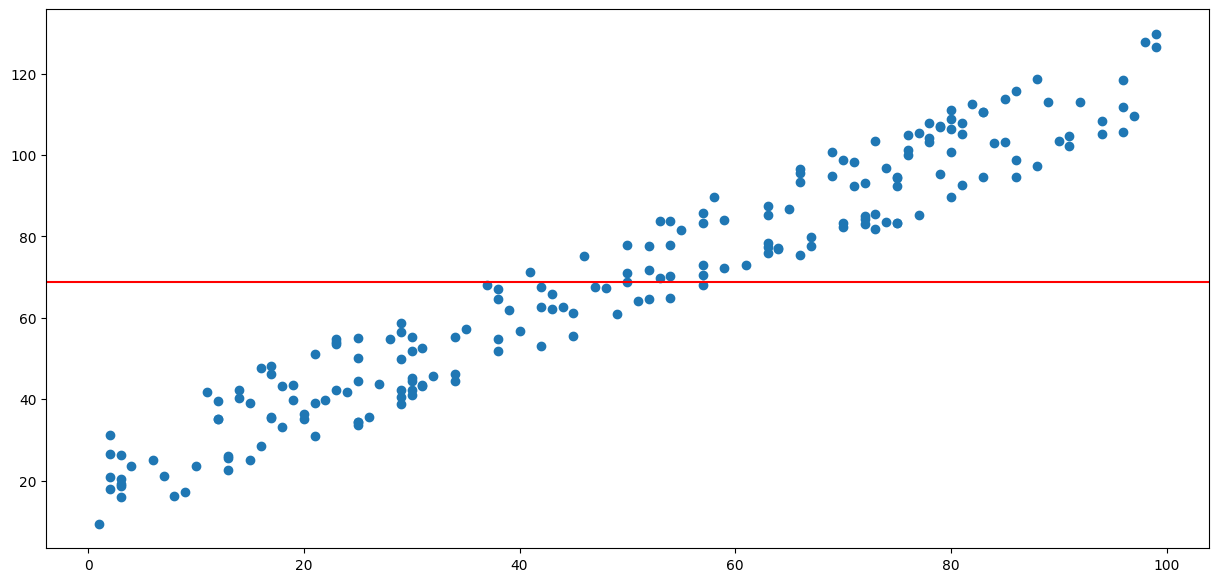

In [26]:
plt.figure(figsize = (15,7))
plt.scatter(x,y)
plt.axhline(y=y.mean(), color = 'red')
plt.show()

# Is the red line(Mean line for y axis) below a good presentation of the entire Data

## Regression
It is an approach where we try to establish a relationship between numerical (either continous or discrete) features and continous target variable.

#### Types of Regression
Regression can be classfied in two broder categories:

    1. Linear Regression
    
        - Simple Linear Regression- 
When we have single input variable  and single target variable. In this the objective is to find a line that can represent the relationship between target and input feature as:
        
        
$$ \hat{y} = \beta_{0} + \beta_{1} \times x $$<br>
        
Where <br>
$ \hat{y} $ is the predicted value of the target<br>
$ \beta_{0} $ is the intercept of the line<br>
$ \beta_{1} $ is the coefficient of regression for the input feature x<br>
           
           - Multiple Linear Regression- 
When we have multiple(two or more) input variable  and single target variable. In this the objective is to find a plane or hyperplane that can represent the relationship between target and input feature as:
        
$$ \hat{y} = \beta_{0} +\sum_{i=1}^{n} \beta_{i} \cdot x{i} $$ <br>
        
Where <br>
$ \hat{y} $ is the predicted value of the target<br>
$ \beta_{0} $ is the intercept of the line<br>
$ \beta_{i} $ is the coefficient of regression for the input feature x_{i}<br>
$ n $ - is number of input features.   

                * Mean Squared Error (MSE): 
A line with minimum of value of MSE will be considered as best fit line. Linear Regression will try with different coefficient of regression and intercept values to ding a line that has minimal MSE. MSE can be calculated as 

$$
MSE = \frac{\sum_{i=1}^{n}  {(y_{i} - \hat{y})}^2}{n}
$$

$$
MSE = \frac{\sum_{i=1}^{n}  {(y_{i} -  (\beta_{0} + \sum_{j=1}^{m} \beta_{j} \cdot x{j}))}^2}{n}
$$        


MAE- Mean Absolute Error

$$
MAE = \frac{\sum_{i=1}^{n}  {|y_{i} - \hat{y}|}}{n}
$$


$$
MAE = \frac{\sum_{i=1}^{n}  {|y_{i} -  (\beta_{0} + \sum_{j=1}^{m} \beta_{j} \cdot x{j})|}}{n}
$$   

For best fit line we use MSE(Mean Squared Error)

To check the Accuracy we use MAE, R-Square(MAE- Mean Absolute Error)



     2. Non Linear Regression
        -Ploynomial Regression

In [27]:
X = np.random.randint(1,10,(5,)) #From 0 to 10, we take 5 random points
Y = np.random.randint(0,10,5) #From 0 to 10, we take 5 random points

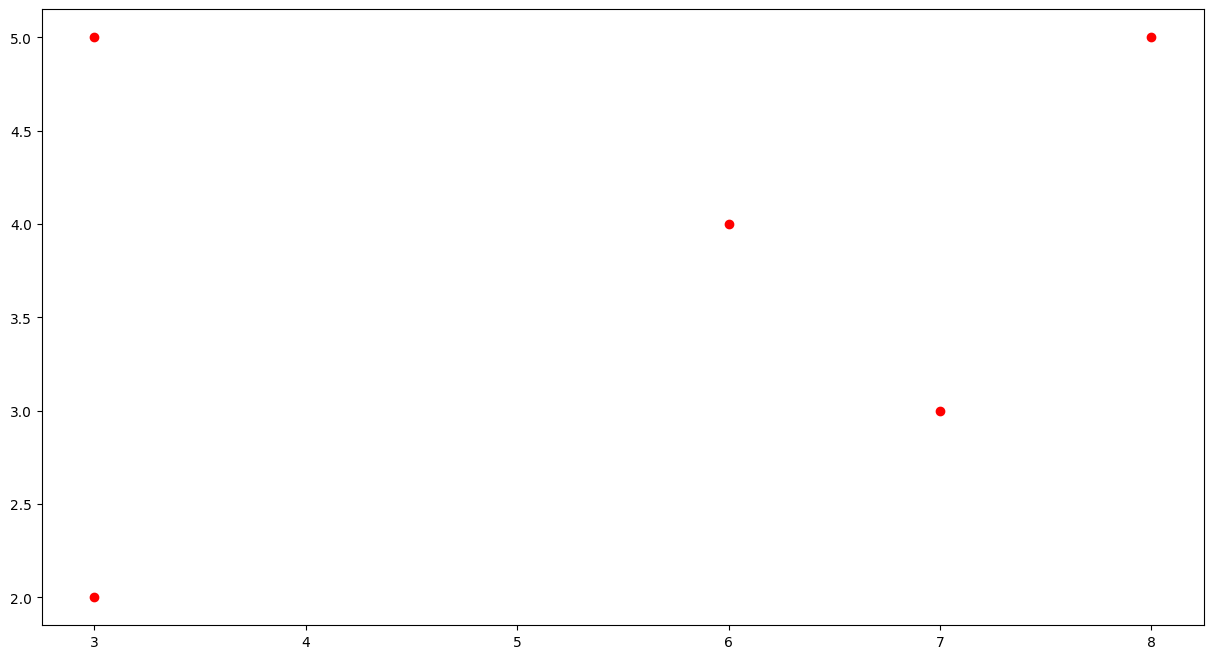

In [28]:
plt.figure(figsize = (15,8))
plt.scatter(X,Y,color = 'red')
plt.show()

In [29]:
# How to fit Linear Regression model on data set 

In [30]:
# Impoering the library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Read the dataset

df = pd.read_csv("tvmarketing.csv")
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [32]:
# View dataframe summary to get the dataframe info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


**Observation** - No missing values in the dataset

In [33]:
# Segregate the input feature to a variable X and the target to Y

X = df.iloc[:,:-1] #All rows, all columns except the last
Y = df.iloc[:,-1]  #All rows, only the last column

In [34]:
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [35]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

### Perform Train Test Split
Train test split technique in ML is used to evaluate a models performance by dividing the data into two parts:
1. Training Set
2. Test Set

The Model is trained on training set and then evaluated on test set to see how well the model performs on new unseen data.

Industry Standard:
Training : Testing
70:30 - lot of data (10,000 Rows)
80:20 - Small data (200 Rows)

We can increase the training size beyond 80% if data is small.

In [36]:
# Perfoming Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 25) #Random_state generates fixed index numbers while sagregating

In [37]:
# Build the model.

# Import the Linear Regression Model from sklearn library
from sklearn.linear_model import LinearRegression
# (All linear Regression models are under sklearn.linear_model)

# Create an instance of the model 
lin_reg = LinearRegression()

# Fit the model to the training data(Train the model)

lin_reg.fit(X_train, Y_train)

print(f"Coefficient for input feature is {lin_reg.coef_} ")
print(f"The Intercept is {lin_reg.intercept_}")

# Predicted y = 0.04885185 *  X + 6.812281094077034



Coefficient for input feature is [0.04885185] 
The Intercept is 6.812281094077034


In [38]:
# Find predictions for the trained model for the test data

y_test_pred = lin_reg.predict(X_test)

# Compare actual with pred in DataFrame

res = pd.DataFrame(Y_test.values, columns=['Actual'])
res['Predicted'] = y_test_pred
res.head()

,Actual,Predicted
0,10.9,8.668651
1,11.6,9.171825
2,11.3,10.490825
3,19.6,14.960769
4,23.8,21.291968


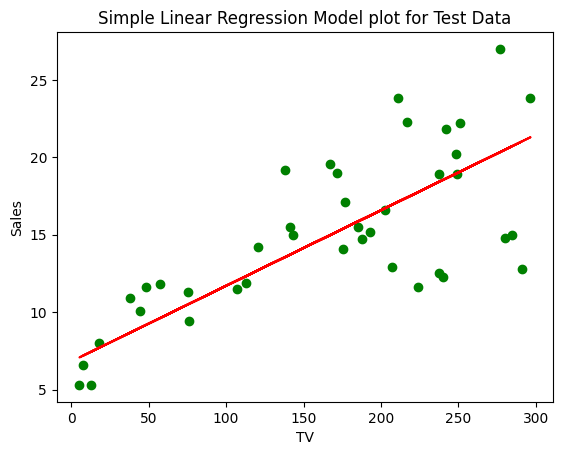

In [39]:
# Visualize the actual test data and the predicted data

plt.scatter(X_test, Y_test, color = 'green')
plt.plot(X_test,y_test_pred, color = 'red')
plt.title('Simple Linear Regression Model plot for Test Data')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

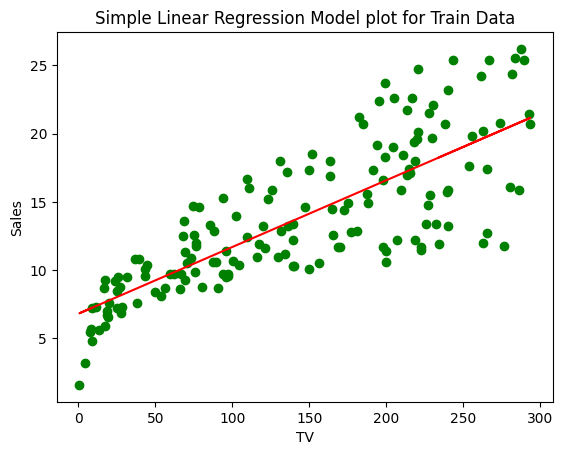

In [40]:
# Visualize the actual train data and the predicted train data

plt.scatter(X_train, Y_train, color = 'green')
plt.plot(X_train,lin_reg.predict(X_train), color = 'red')
plt.title('Simple Linear Regression Model plot for Train Data')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error

print(f" MSE test data {mean_squared_error(Y_test, y_test_pred)}")

print(f" MSE train Data {mean_squared_error(Y_train, lin_reg.predict(X_train))}")

 MSE test data 12.776655419698352
 MSE train Data 9.963416065352098


### OverFitting and UnderFitting

We develop ML models acheiving the right balance between the model complexity and simmplicity.
    
**OverFitting**
Overfitting occurs when a model learns the noise and details in the training data too well to that extent that it negitivly impacts its performance on unseen data. This can be identified if the model has
high Accuracy on Training Data and poor accuracy on test data.
Overfitting is caused beacause of model being too complex(too many features to be trainined on)

**UnderFitting**
UnderFitting happens when a model is too simple to understand the underlying pattern/relationship in the data. This can be identified as the model has poor accuracy on both training data and test data.
Overfitting is caused because of model being too simple (too few featues to be trainied on)

**Bias Variance Trade-off**
- Bias: It is measused as the difference between the actual and predicted value(error due to overly simplistic model). High bias can cause UnderFitting.
- Variance: It is measured as the average squared distance of the datapoints from the mean(Error due to excessively complex model).
High variance can caused OverFitting.

**Trade-off**
- Low Bias & High variance: Model fits traning data well but may fails to generalize (OverFitting).
- High Bias & Low Variance: Model does not fit training data as well as test data (UnderFitting)
- Low Bias & Low Variance: Model fits both training data and test data well (Optimal Model).
- High Bias & High Variance: Bad model.

### R Squared (R2)

It explains how much of the variation in the dependent variable(Y) can be attributed to changes in the independent variable(X). The value ranges between 0 and 1.<br>
- **0**: Indicates that the model explains none of the variance in the dependent variable. The independent variable(X) has no explainatory power for the changes in Y.<br>
- **1**: This represents a perfet fit, the model explains all variance in the dependent variable. The independent variable (X) has no explanatory to the changes in Y. The changes in Y are perfectly captured by X.

A higher R Squared value generally suggest a better fit model, but it should not be considered as the only factor, as in overfitted model we may have higher R2 Score.  


- RSS: Residual Sum Squared : (y-(Predicted line)^2
- TSS: Total Sum Squared : (y - (mean line))^2

**R2 = 1-(RSS/TSS)**

We call this formula as coefficient of Determination 

In [42]:
# Using the model above on tvmarketing data

y_test_pred = lin_reg.predict(X_test)
y_train_pred = lin_reg.predict(X_train)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

mse_train = mean_squared_error(Y_train, y_train_pred)
mse_test = mean_squared_error(Y_test, y_test_pred)
r2_train = r2_score(Y_train, y_train_pred)
r2_test = r2_score(Y_test, y_test_pred)

In [44]:
print(f"Training Set MSE : {mse_train:.3f}")
print(f"Testing Set MSE : {mse_test:.3f}")
print(f"Training Set R2 Score : {r2_train:.3f}")
print(f"Testing Set R2 Score : {r2_test:.3f}")

Training Set MSE : 9.963
Testing Set MSE : 12.777
Training Set R2 Score : 0.631
Testing Set R2 Score : 0.510


In [45]:
if mse_train < mse_test or r2_train > r2_test: 
    if abs(r2_train - r2_test) > 0.1:     #0.1 - Threshold value(10%)
        print("Model may be overfitting on train data")
    else:
         print("Model performs resonably well, but check for slight overfit")
elif mse_train > mse_test and r2_train < r2_test:
    print("MOdel may be underfitting, consider increasing model complexity")
else:
    print("Model has balanced fit for both training and testing data")

Model may be overfitting on train data


## Polynomial Regression

It is a subset of linear regression that includes polynomial terms. The relationship between an independent variable and dependent variable is modeled as an nth degree polynomial.

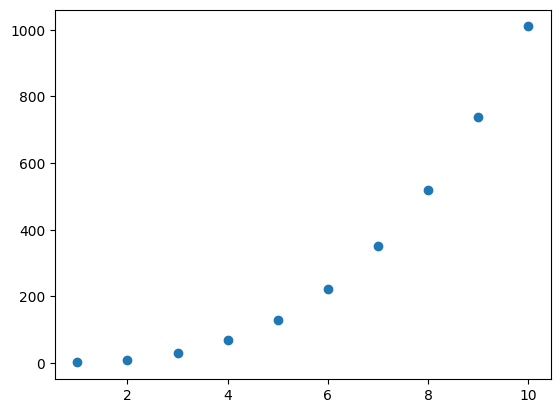

In [47]:
X = np.arange(1,11)
y = X**3 + X

plt.scatter(X, y)
plt.show()

In [99]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25) #Random_state generates fixed index numbers while sagregating

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 4)

X_train_poly = poly_features.fit_transform(X_train.reshape(-1,1))
X_test_poly = poly_features.fit_transform(X_test.reshape(-1,1))

In [100]:
X_train.shape

(8,)

In [101]:
X_train_poly

array([[1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02]])

In [102]:
X_train.ndim

1

In [103]:
X_train_poly.shape

(8, 5)

In [104]:
X_train.reshape(-1,1)  #Creating 2D array

array([[ 4],
       [ 9],
       [ 1],
       [ 3],
       [10],
       [ 8],
       [ 7],
       [ 5]])

In [105]:
# Fit a linear regression model to the processed data

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [106]:
print(poly_model.coef_ )

[ 0.00000000e+00  1.00000000e+00  2.90045765e-15  1.00000000e+00
 -1.33226763e-15]


In [111]:
X_train_poly 

array([[1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02]])

In [114]:
y_pred = np.dot(X_train_poly, poly_model.coef_)

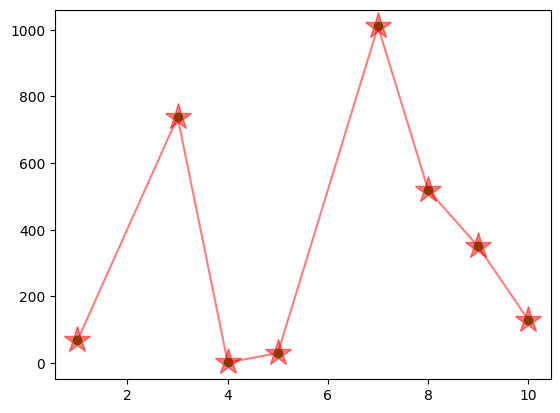

In [116]:
plt.scatter(np.sort(X_train), y_train, color = 'green', label = 'Original Data')
plt.plot(np.sort(X_train), y_pred , color = 'red', label = 'Predicted Data', marker = '*', markersize = 20, alpha =0.5)

# Apply polynomial Regression on TV marketing Data

In [118]:
df = pd.read_csv('tvmarketing.csv')

In [119]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

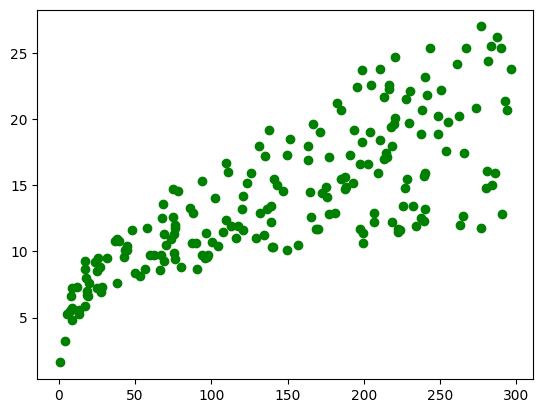

In [120]:
plt.scatter(X,y , color ='green')
plt.show()

In [122]:
lin_m = LinearRegression()
lin_m.fit(X,y)

y_predicted = lin_m.predict(X)

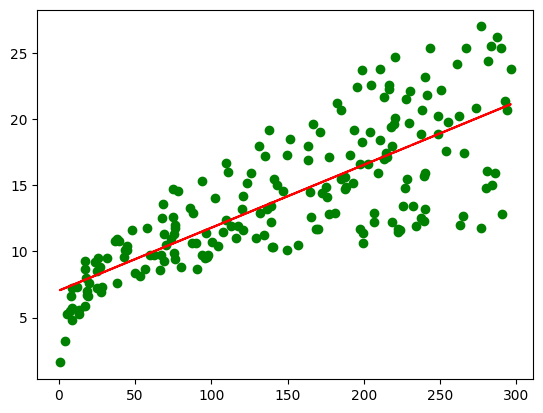

In [124]:
plt.scatter (X,y, color = 'green')
plt.plot(X,y_predicted, color = 'red')
plt.show()

In [139]:
p_f = PolynomialFeatures(degree = 10)
polyX = p_f.fit_transform(X)

lin_model = LinearRegression()
lin_model.fit(polyX, y)
y_predicted_poly = lin_model.predict(polyX)

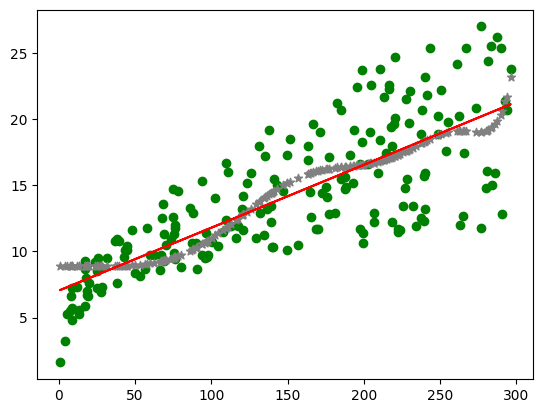

In [141]:
plt.scatter(X,y, color = 'green')
plt.plot(X,y_predicted, color = 'red')
plt.scatter(X, y_predicted_poly, color = 'grey', marker = '*')
plt.show()

### Model Evaluation and Validation
#### Perforance Matrix
These parameters gives us the quantitative measures of regression model performance, this allow us to assess and select the best model for a perticular dataset.

- Mean Squared Error : It is a measure of average of the squared errors. A lower value of MSE indicates better model performance.
  
- Root Mean Squared Error : It is the squared root of MSE, which gives the average magnitude of the errors in the predicted values. RMSE is in same unit as the original dependent variable, hence makes it easier to interpret than MSE.

- Mean Absolute Error : Calulates the average of absolute error and it is less sensitive to ouliers than MSE and RMSE

- R2 Score : As Explained above 

#### Cross Validation Techniques
Cross Validation is a ML technique that evaluates the model performance on unseen data by dividing the data into multiple folds. In each iteration one fold is used as validation set and remaining as training data. Process is repeated such that each fold serves as validation set once. The results of all iterations are averaged to get a robust estimate of model performance.

- **KFold Cross Validation**(Generally Used in Regression) : The dataset is divided into k equally sized folds. The model is tranined on k-1 folds and tested on the remaining fold. This is repeated k times so that each fold can be used exactly once for testing model.
 Advantage: More Reliable and accurate
 Disadvantage: Comuntationally intensive for large datasets.

- **StratifiedFold Cross Validation**(Used in Classification) : Similar to K-folds but ensures that each folds has the same proportion of different classes as original dataset.

In [ ]:
### Implementation of K-Fold Cross Validation.

In [4]:
### - import Necessary Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [6]:
### Read and Explore the data

hd = pd.read_csv('housing_with_ocean_proximity.csv')
hd.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


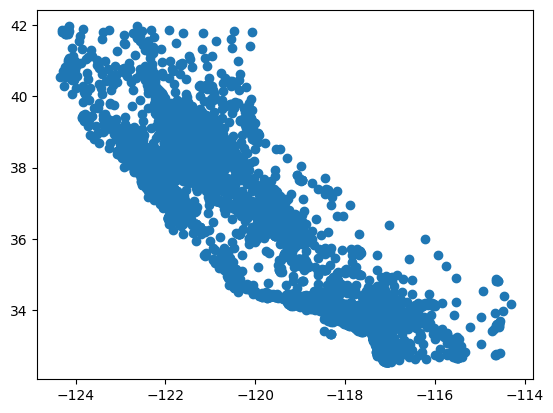

<Axes: xlabel='longitude', ylabel='latitude'>

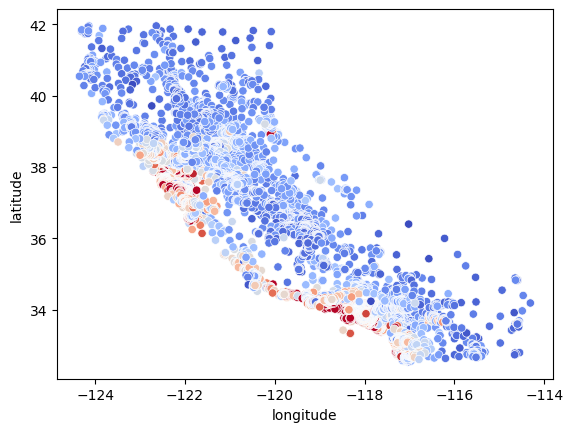

In [13]:
### To check the state of US using the data (logitude and latitude)
plt.scatter(hd['longitude'], hd['latitude'])
plt.show()


import seaborn as sns
sns.scatterplot(x='longitude', y='latitude',hue = 'median_house_value', legend = False, data = hd, palette = 'coolwarm')

In [14]:
### Display Statistical Information

hd.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [15]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [16]:
### Check for missing values

hd.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [17]:
### Drop missing Data Rows

hd = hd.dropna()

hd.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [18]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [19]:
### Use get dummies to one hot encode ocean proximity

hd = pd.get_dummies(hd, drop_first = True, dtype = 'int', prefix = 'op')

In [20]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   op_INLAND           20433 non-null  int64  
 10  op_ISLAND           20433 non-null  int64  
 11  op_NEAR BAY         20433 non-null  int64  
 12  op_NEAR OCEAN       20433 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 2.2 MB


In [21]:
###  Extract features and Columns and perform train test split with test size 30%

X = hd.drop(columns = ['median_house_value'])
y = hd['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [22]:
### Perform K-Fold Validation

kf = KFold(n_splits = 10, random_state = 25, shuffle = True)

### n_Split - divides the data in n fold
### random_state - ensures reproducibile shuffling
### shuffle - Shuffles thje data before splitting

In [24]:
### Create model and use KFOLD on training data

model =  LinearRegression()

In [26]:
k_fold_scores = cross_val_score(model, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = kf, n_jobs = -1)

### cross_val_score - evalute the model using cross validation
### Model - machine Learning Model to be evaluated
### scoring = 'neg_mean_absolute_Error' - use Negetive MAE as performance metric
### cv = Cross validation stratergy(KFold)
### n_jobs = '-1' -  Utilizes all available processors for parallel processing

In [33]:
print(k_fold_scores)  #ten scores for each fold

[-49216.11771741 -48502.96771955 -51382.13038585 -49716.67805829
 -49025.40795133 -51147.10571037 -50413.78405574 -49262.31776615
 -49212.06496498 -50371.50671368]


In [30]:
print(f"Average MAE from 10 folds = {np.abs(np.mean(k_fold_scores)):.4f}")

Average MAE from 10 folds = 49825.0081


In [35]:
### Applying Model to calculate MSE, MAE, R2 Score for test Data

model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2score = r2_score(y_test, y_test_pred)

print(f'MSE = {test_mse:.4f}')
print(f'MAE = {test_mae:.4f}')
print(f'R2 Score = {test_r2score:.4f}')
print(f'RMSE = {np.sqrt(test_mse):.4f}')

MSE = 4700503317.9555
MAE = 50022.1972
R2 Score = 0.6376
RMSE = 68560.2167
